In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from fairmlhealth import model_comparison as fhmc

In [2]:
df = pd.read_csv(r"C:\Users\wendy\UW CS Graduate\CS581_Machine Learning\Assignments\HW2\SouthGermanCredit\SouthGermanCredit.asc", sep=" ")

In [3]:
print("The shape of the DataFrame is: {}".format(df.shape))

The shape of the DataFrame is: (1000, 21)


In [4]:
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
input_n = df.drop(['kredit'], axis='columns')

In [7]:
print(input_n)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  wohnzeit  verm  alter  wei

In [8]:
target_n = df['kredit']

In [9]:
print(target_n)

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: kredit, Length: 1000, dtype: int64


### Let us leave out 30% of the data for testing after building the model for more realistic model performance report

In [10]:
X_Train, X_Test, y_Train, y_Test = train_test_split(input_n, target_n, test_size=0.30, random_state=0)

## i) Build the model with Logistic Regression Method

In [11]:
kfold = StratifiedKFold(n_splits=10)
m_lr = LogisticRegression() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

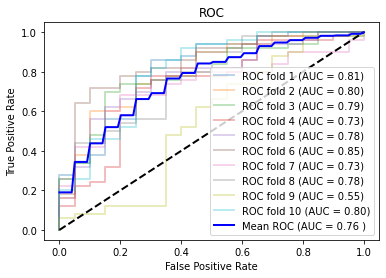

In [12]:
x = X_Train
y = y_Train
for train,test in kfold.split(x,y):
    model = m_lr.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
print(recalls)
print(np.mean(recalls))

[0.94, 0.9, 0.76, 0.86, 0.9, 0.92, 0.88, 0.94, 0.84, 0.94]
0.8879999999999999


In [14]:
print(precisions)
print(np.mean(precisions))

[0.7966101694915254, 0.8181818181818182, 0.8260869565217391, 0.7678571428571429, 0.7758620689655172, 0.8070175438596491, 0.7457627118644068, 0.7966101694915254, 0.75, 0.8103448275862069]
0.789433340881953


In [15]:
print(f1scores)
print(np.mean(f1scores))

[0.8623853211009174, 0.8571428571428572, 0.7916666666666667, 0.8113207547169812, 0.8333333333333334, 0.8598130841121495, 0.8073394495412843, 0.8623853211009174, 0.7924528301886793, 0.8703703703703703]
0.8348209988274157


In [16]:
print(aucs)
print(np.mean(aucs))

[0.8109999999999999, 0.802, 0.785, 0.727, 0.775, 0.848, 0.73, 0.777, 0.548, 0.804]
0.7607


Report the performance metrics with the left out testing data:

In [17]:
y_pred = m_lr.predict(X_Test)

In [18]:
scores_lr = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_Test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.74      0.37      0.49       100
           1       0.75      0.94      0.83       200

    accuracy                           0.75       300
   macro avg       0.74      0.65      0.66       300
weighted avg       0.75      0.75      0.72       300



In [19]:
auc_lr

0.6525000000000001

## ii) Build the model with Decision Tree

In [20]:
m_dt = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

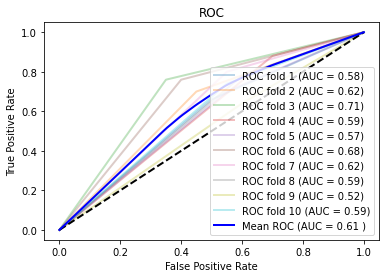

In [21]:
x = X_Train
y = y_Train
for train,test in kfold.split(x,y):
    model = m_dt.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [22]:
print(recalls)
print(np.mean(recalls))

[0.66, 0.7, 0.76, 0.88, 0.7, 0.76, 0.8, 0.78, 0.64, 0.74]
0.742


In [23]:
print(precisions)
print(np.mean(precisions))

[0.7674418604651163, 0.7954545454545454, 0.8444444444444444, 0.7586206896551724, 0.7608695652173914, 0.8260869565217391, 0.7843137254901961, 0.7647058823529411, 0.7272727272727273, 0.7708333333333334]
0.7800043730207606


In [24]:
print(f1scores)
print(np.mean(f1scores))

[0.7096774193548386, 0.7446808510638298, 0.8, 0.8148148148148148, 0.7291666666666667, 0.7916666666666667, 0.792079207920792, 0.7722772277227723, 0.6808510638297872, 0.7551020408163266]
0.7590315958856495


In [25]:
print(aucs)
print(np.mean(aucs))

[0.5800000000000001, 0.625, 0.7050000000000001, 0.5900000000000001, 0.575, 0.68, 0.625, 0.5900000000000001, 0.52, 0.595]
0.6085


Report the performance metrics with the left out testing data:

In [26]:
y_pred = m_dt.predict(X_Test)

In [27]:
scores_lr = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_Test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.56      0.39      0.46       100
           1       0.73      0.84      0.79       200

    accuracy                           0.69       300
   macro avg       0.65      0.62      0.62       300
weighted avg       0.68      0.69      0.68       300



In [28]:
auc_lr

0.6174999999999999

## iii) Build the model with Naive Bayes

In [29]:
m_gnb = GaussianNB() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

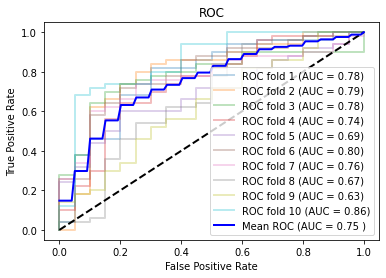

In [30]:
x = X_Train
y = y_Train
for train,test in kfold.split(x,y):
    model = m_gnb.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [31]:
print(recalls)
print(np.mean(recalls))

[0.86, 0.8, 0.76, 0.78, 0.66, 0.74, 0.78, 0.78, 0.74, 0.82]
0.772


In [32]:
print(precisions)
print(np.mean(precisions))

[0.8113207547169812, 0.8695652173913043, 0.8837209302325582, 0.7959183673469388, 0.8048780487804879, 0.8409090909090909, 0.8297872340425532, 0.78, 0.7551020408163265, 0.8367346938775511]
0.8207936378113793


In [33]:
print(f1scores)
print(np.mean(f1scores))

[0.8349514563106797, 0.8333333333333333, 0.8172043010752689, 0.7878787878787878, 0.7252747252747254, 0.7872340425531915, 0.8041237113402062, 0.78, 0.7474747474747474, 0.8282828282828283]
0.7945757933523769


In [34]:
print(aucs)
print(np.mean(aucs))

[0.78, 0.7949999999999999, 0.78, 0.744, 0.689, 0.7959999999999999, 0.762, 0.6689999999999999, 0.632, 0.858]
0.7505


Report the performance metrics with the left out testing data:

In [35]:
y_pred = m_gnb.predict(X_Test)

In [36]:
scores_lr = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_Test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       100
           1       0.82      0.81      0.82       200

    accuracy                           0.76       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.76      0.76      0.76       300



In [37]:
auc_lr

0.7275

## iv) Build the model with Random Forest

In [38]:
m_rfc = RandomForestClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

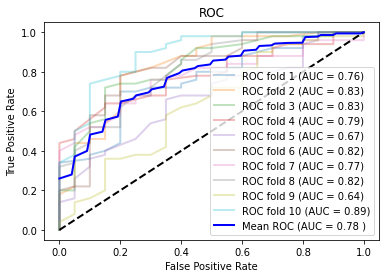

In [39]:
x = X_Train
y = y_Train
for train,test in kfold.split(x,y):
    model = m_rfc.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [40]:
print(recalls)
print(np.mean(recalls))

[0.92, 0.96, 0.92, 0.92, 0.82, 0.94, 0.88, 0.96, 0.94, 0.98]
0.924


In [41]:
print(precisions)
print(np.mean(precisions))

[0.7540983606557377, 0.8275862068965517, 0.8214285714285714, 0.7666666666666667, 0.7192982456140351, 0.7966101694915254, 0.7457627118644068, 0.8, 0.7580645161290323, 0.8166666666666667]
0.7806182115413194


In [42]:
print(f1scores)
print(np.mean(f1scores))

[0.8288288288288288, 0.888888888888889, 0.8679245283018867, 0.8363636363636363, 0.7663551401869159, 0.8623853211009174, 0.8073394495412843, 0.8727272727272728, 0.8392857142857143, 0.890909090909091]
0.8461007871134436


In [43]:
print(aucs)
print(np.mean(aucs))

[0.7575, 0.833, 0.8255, 0.7855000000000001, 0.672, 0.823, 0.773, 0.8160000000000001, 0.636, 0.894]
0.7815500000000001


Report the performance metrics with the left out testing data:

In [44]:
y_pred = m_rfc.predict(X_Test)

In [45]:
scores_lr = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_Test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.73      0.30      0.43       100
           1       0.73      0.94      0.82       200

    accuracy                           0.73       300
   macro avg       0.73      0.62      0.62       300
weighted avg       0.73      0.73      0.69       300



In [46]:
auc_lr

0.6225

## v) Build the model with XGBoost

### Here we use Gradient Boosting Classifier for XGBoost

In [47]:
m_gbc = GradientBoostingClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

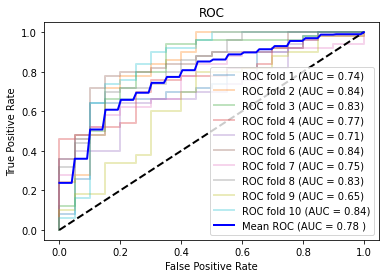

In [48]:
x = X_Train
y = y_Train
for train,test in kfold.split(x,y):
    model = m_gbc.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [49]:
print(recalls)
print(np.mean(recalls))

[0.88, 0.92, 0.8, 0.84, 0.82, 0.92, 0.9, 0.94, 0.86, 0.94]
0.882


In [50]:
print(precisions)
print(np.mean(precisions))

[0.7719298245614035, 0.8363636363636363, 0.851063829787234, 0.75, 0.7321428571428571, 0.7540983606557377, 0.7894736842105263, 0.8103448275862069, 0.7543859649122807, 0.8392857142857143]
0.7889088699505596


In [51]:
print(f1scores)
print(np.mean(f1scores))

[0.822429906542056, 0.8761904761904761, 0.8247422680412372, 0.7924528301886793, 0.7735849056603773, 0.8288288288288288, 0.8411214953271027, 0.8703703703703703, 0.8037383177570094, 0.8867924528301886]
0.8320251851736324


In [52]:
print(aucs)
print(np.mean(aucs))

[0.74, 0.8440000000000001, 0.832, 0.765, 0.713, 0.842, 0.754, 0.826, 0.6539999999999999, 0.845]
0.7815


Report the performance metrics with the left out testing data:

In [53]:
y_pred = m_gbc.predict(X_Test)

In [54]:
scores_lr = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_Test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.72      0.34      0.46       100
           1       0.74      0.94      0.83       200

    accuracy                           0.74       300
   macro avg       0.73      0.64      0.64       300
weighted avg       0.73      0.74      0.70       300



In [55]:
auc_lr

0.6375

## Fairness report of the models

Because of the fairness computation needs the protected attribute to be binary, let us first convert the feature into binary coding:

In [56]:
print("Unique Values of gastarb: {}".format(np.sort(X_Test.gastarb.unique())))

Unique Values of gastarb: [1 2]


In [57]:
le_gastarb = LabelEncoder()

In [58]:
X_Test['gastarb_n'] = le_gastarb.fit_transform(X_Test['gastarb'])

<ipython-input-58-310be514fe87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Test['gastarb_n'] = le_gastarb.fit_transform(X_Test['gastarb'])


In [59]:
X_Test.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,gastarb_n
993,1,18,4,0,3966,1,5,1,2,1,...,1,33,1,1,3,3,2,2,2,1
859,1,12,2,3,727,2,2,4,4,1,...,4,33,3,2,1,2,2,2,2,1
298,2,12,2,2,983,4,2,1,2,1,...,1,19,3,1,1,2,2,1,2,1
553,4,10,2,8,894,5,4,4,2,1,...,2,40,3,2,1,3,2,2,2,1
672,2,18,2,3,1113,1,3,4,2,3,...,1,26,3,2,1,2,1,1,2,1
971,2,27,0,9,8318,1,5,2,2,1,...,4,42,2,3,2,4,2,2,2,1
27,2,9,4,3,1154,1,5,2,3,1,...,1,37,3,2,3,2,2,1,2,1
231,4,6,0,3,426,1,5,4,4,1,...,3,39,3,2,1,2,2,1,2,1
306,1,6,2,2,1374,1,3,1,3,1,...,1,36,1,2,1,2,2,2,2,1
706,3,24,4,2,3617,5,5,4,3,2,...,4,20,3,1,2,3,2,1,2,1


In [60]:
X_Test.drop(['gastarb'], axis=1, inplace=True)

In [61]:
X_Test

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb_n
993,1,18,4,0,3966,1,5,1,2,1,4,1,33,1,1,3,3,2,2,1
859,1,12,2,3,727,2,2,4,4,1,3,4,33,3,2,1,2,2,2,1
298,2,12,2,2,983,4,2,1,2,1,4,1,19,3,1,1,2,2,1,1
553,4,10,2,8,894,5,4,4,2,1,3,2,40,3,2,1,3,2,2,1
672,2,18,2,3,1113,1,3,4,2,3,4,1,26,3,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,24,4,9,4526,1,3,3,3,1,2,1,74,3,2,1,4,2,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,1
984,1,48,2,3,6999,1,4,1,4,3,1,1,34,3,2,2,3,2,2,1
491,4,12,4,2,3331,1,5,2,3,1,4,2,42,2,2,1,3,2,1,1


In [62]:
print("Unique Values of gastarb: {}".format(np.sort(X_Test.gastarb_n.unique())))

Unique Values of gastarb: [0 1]


In [63]:
# use foreign worker as protected attributes
prtc_attr = X_Test['gastarb_n']

In [64]:
# Specify either a dict of trained models to compare
model_dict = {'model_1': m_lr, 'model_2': m_dt, 'model_3': m_gnb, 'model_4': m_rfc, 'model_4': m_gbc}

In [65]:
# Pass the above to the compare models function
fhmc.compare_measures(X_Test, y_Test, prtc_attr, model_dict)

model_1  \
Group Fairness       Statistical Parity Difference             0.1712   
                     Disparate Impact Ratio                    1.2066   
                     Demographic Parity Difference             0.1712   
                     Demographic Parity Ratio                  0.8288   
                     Average Odds Difference                   0.2205   
                     Equal Opportunity Difference              0.0674   
                     Equalized Odds Difference                 0.3737   
                     Equalized Odds Ratio                      0.6263   
                     Positive Predictive Parity Difference     0.1312   
                     Balanced Accuracy Difference             -0.1532   
                     AUC Difference                            0.0837   
Individual Fairness  Consistency Score                         0.7893   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.7480   
                     Recall                                    0.9350   
                     F1-Score                                  0.8311   
                     Accuracy                                  0.7467   

                                                              model_2  \
Group Fairness       Statistical Parity Difference            -0.1455   
                     Disparate Impact Ratio                    0.8111   
                     Demographic Parity Difference             0.1455   
                     Demographic Parity Ratio                  0.8111   
                     Average Odds Difference                  -0.3758   
                     Equal Opportunity Difference             -0.1355   
                     Equalized Odds Difference                 0.6162   
                     Equalized Odds Ratio                      0.0000   
                     Positive Predictive Parity Difference     0.2711   
                     Balanced Accuracy Difference              0.2404   
                     AUC Difference                            0.2404   
Individual Fairness  Consistency Score                         0.7233   
                     Between-Group Generalized Entropy Error   0.0014   
Model Performance ** Precision                                 0.7348   
                     Recall                                    0.8450   
                     F1-Score                                  0.7860   
                     Accuracy                                  0.6933   

                                                              model_3  model_4  
Group Fairness       Statistical Parity Difference             0.0000   0.1027  
                     Disparate Impact Ratio                    1.0000   1.1145  
                     Demographic Parity Difference             0.0000   0.1027  
                     Demographic Parity Ratio                  1.0000   0.8973  
                     Average Odds Difference                   0.0000   0.1368  
                     Equal Opportunity Difference              0.0000   0.0311  
                     Equalized Odds Difference                 0.0000   0.2424  
                     Equalized Odds Ratio                      1.0000   0.7576  
                     Positive Predictive Parity Difference     0.2140   0.1613  
                     Balanced Accuracy Difference              0.0000  -0.1057  
                     AUC Difference                           -0.2966   0.0897  
Individual Fairness  Consistency Score                         1.0000   0.8627  
                     Between-Group Generalized Entropy Error   0.0003   0.0001  
Model Performance ** Precision                                 0.6667   0.7185  
                     Recall                                    1.0000   0.9700  
                     F1-Score                                  0.8000   0.8255  
                     Accuracy                          

## Question 5: Mimic Models

### i) Build the mimic model after the Logistic Regression model

In [155]:
y_mimic = m_lr.predict(X_Train)

In [156]:
y_lrTrain = pd.DataFrame(y_mimic)

In [157]:
kfold = StratifiedKFold(n_splits=10)
mimic_dt1 = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

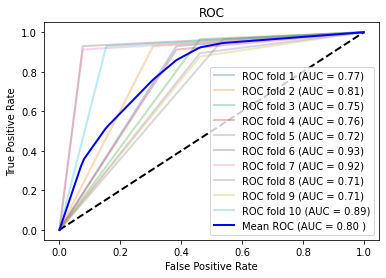

In [158]:
x = X_Train
y = y_lrTrain
for train,test in kfold.split(x,y):
    model = mimic_dt1.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [159]:
print(recalls)
print(np.mean(recalls))

[0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.9649122807017544, 0.8771929824561403, 0.9298245614035088]
0.9245614035087719


In [160]:
print(precisions)
print(np.mean(precisions))

[0.9137931034482759, 0.9298245614035088, 0.9016393442622951, 0.9122807017543859, 0.8947368421052632, 0.9814814814814815, 0.9811320754716981, 0.8870967741935484, 0.8928571428571429, 0.9636363636363636]
0.9258478390613962


In [161]:
print(f1scores)
print(np.mean(f1scores))

[0.9217391304347825, 0.9298245614035088, 0.9322033898305084, 0.9122807017543859, 0.8947368421052632, 0.954954954954955, 0.9454545454545454, 0.9243697478991597, 0.8849557522123894, 0.9464285714285715]
0.9246948197478069


In [162]:
print(aucs)
print(np.mean(aucs))

[0.7726045883940622, 0.8110661268556005, 0.7516869095816464, 0.7638326585695007, 0.7165991902834008, 0.926450742240216, 0.9176788124156545, 0.713225371120108, 0.7078272604588394, 0.8879892037786775]
0.7968960863697706


Report the performance metrics with the left out testing data:

In [163]:
y_pred = mimic_dt1.predict(X_Test)

In [164]:
scores_lrMimic = classification_report(y_Test, y_pred, labels=[0, 1])
auc_lrMimic = roc_auc_score(y_Test, y_pred)
print(scores_lrMimic)

              precision    recall  f1-score   support

           0       0.63      0.36      0.46       100
           1       0.74      0.90      0.81       200

    accuracy                           0.72       300
   macro avg       0.68      0.63      0.63       300
weighted avg       0.70      0.72      0.69       300



In [165]:
auc_lrMimic

0.6275

### ii) Build the mimic model after the Decision Tree model

In [166]:
y_mimic = m_dt.predict(X_Train)

In [167]:
y_dtTrain = pd.DataFrame(y_mimic)

In [168]:
kfold = StratifiedKFold(n_splits=10)
mimic_dt2 = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

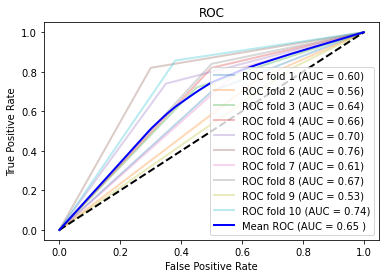

In [169]:
x = X_Train
y = y_dtTrain
for train,test in kfold.split(x,y):
    model = mimic_dt2.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [170]:
print(recalls)
print(np.mean(recalls))

[0.7, 0.76, 0.72, 0.82, 0.74, 0.82, 0.82, 0.84, 0.8163265306122449, 0.8571428571428571]
0.7893469387755101


In [171]:
print(precisions)
print(np.mean(precisions))

[0.7777777777777778, 0.7450980392156863, 0.8, 0.803921568627451, 0.8409090909090909, 0.8723404255319149, 0.7735849056603774, 0.8076923076923077, 0.7142857142857143, 0.84]
0.7975609829700321


In [172]:
print(f1scores)
print(np.mean(f1scores))

[0.7368421052631577, 0.7524752475247525, 0.7578947368421052, 0.8118811881188118, 0.7872340425531915, 0.8453608247422681, 0.796116504854369, 0.8235294117647058, 0.7619047619047619, 0.8484848484848485]
0.7921723672052973


In [173]:
print(aucs)
print(np.mean(aucs))

[0.6, 0.555, 0.635, 0.6599999999999999, 0.6950000000000001, 0.7599999999999999, 0.61, 0.6699999999999999, 0.5272108843537415, 0.7380952380952381]
0.645030612244898


Report the performance metrics with the left out testing data:

In [174]:
y_pred = mimic_dt2.predict(X_Test)

In [175]:
scores_dtMimic = classification_report(y_Test, y_pred, labels=[0, 1])
auc_dtMimic = roc_auc_score(y_Test, y_pred)
print(scores_dtMimic)

              precision    recall  f1-score   support

           0       0.50      0.35      0.41       100
           1       0.72      0.82      0.77       200

    accuracy                           0.67       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.64      0.67      0.65       300



In [176]:
auc_dtMimic

0.5874999999999999

### iii) Build the mimic model after the Naive Bayes model

In [177]:
y_mimic = m_gnb.predict(X_Train)

In [178]:
y_gnbTrain = pd.DataFrame(y_mimic)

In [179]:
kfold = StratifiedKFold(n_splits=10)
mimic_dt3 = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

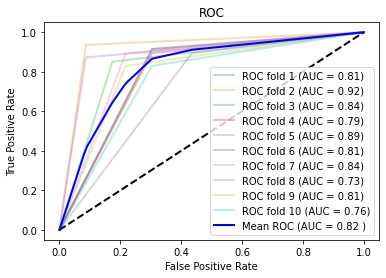

In [180]:
x = X_Train
y = y_gnbTrain
for train,test in kfold.split(x,y):
    model = mimic_dt3.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [181]:
print(recalls)
print(np.mean(recalls))

[0.9148936170212766, 0.9361702127659575, 0.851063829787234, 0.8936170212765957, 0.8723404255319149, 0.9148936170212766, 0.8936170212765957, 0.8936170212765957, 0.8297872340425532, 0.8297872340425532]
0.8829787234042552


In [182]:
print(precisions)
print(np.mean(precisions))

[0.86, 0.9565217391304348, 0.9090909090909091, 0.8571428571428571, 0.9534883720930233, 0.86, 0.8936170212765957, 0.8076923076923077, 0.8863636363636364, 0.8478260869565217]
0.8831742929746286


In [183]:
print(f1scores)
print(np.mean(f1scores))

[0.8865979381443299, 0.9462365591397849, 0.8791208791208791, 0.875, 0.9111111111111112, 0.8865979381443299, 0.8936170212765957, 0.8484848484848485, 0.8571428571428571, 0.8387096774193549]
0.882261882998409


In [184]:
print(aucs)
print(np.mean(aucs))

[0.80527289546716, 0.9246068455134135, 0.8385753931544865, 0.7946345975948196, 0.8926919518963923, 0.80527289546716, 0.8381128584643848, 0.7294172062904718, 0.8061979648473635, 0.7627197039777983]
0.819750231267345


Report the performance metrics with the left out testing data:

In [185]:
y_pred = mimic_dt3.predict(X_Test)

In [186]:
scores_gnbMimic = classification_report(y_Test, y_pred, labels=[0, 1])
auc_gnbMimic = roc_auc_score(y_Test, y_pred)
print(scores_gnbMimic)

              precision    recall  f1-score   support

           0       0.60      0.43      0.50       100
           1       0.75      0.85      0.80       200

    accuracy                           0.71       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.70      0.71      0.70       300



In [187]:
auc_gnbMimic

0.6425000000000001

### iv) Build the mimic model after the Ranfom Forest model

In [188]:
y_mimic = m_rfc.predict(X_Train)

In [189]:
y_rfcTrain = pd.DataFrame(y_mimic)

In [190]:
kfold = StratifiedKFold(n_splits=10)
mimic_dt4 = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

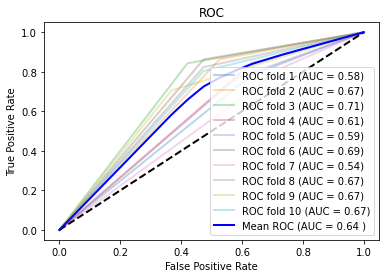

In [191]:
x = X_Train
y = y_rfcTrain
for train,test in kfold.split(x,y):
    model = mimic_dt4.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [192]:
print(recalls)
print(np.mean(recalls))

[0.7843137254901961, 0.8627450980392157, 0.8431372549019608, 0.8431372549019608, 0.7647058823529411, 0.8627450980392157, 0.8235294117647058, 0.8235294117647058, 0.7058823529411765, 0.803921568627451]
0.8117647058823529


In [193]:
print(precisions)
print(np.mean(precisions))

[0.7692307692307693, 0.8148148148148148, 0.8431372549019608, 0.7818181818181819, 0.78, 0.8301886792452831, 0.75, 0.8235294117647058, 0.8372093023255814, 0.82]
0.8049928414101297


In [194]:
print(f1scores)
print(np.mean(f1scores))

[0.7766990291262137, 0.838095238095238, 0.8431372549019607, 0.8113207547169811, 0.7722772277227723, 0.8461538461538461, 0.7850467289719627, 0.8235294117647058, 0.7659574468085107, 0.8118811881188118]
0.8074098126381003


In [195]:
print(aucs)
print(np.mean(aucs))

[0.5763673890608875, 0.6682146542827658, 0.7110423116615068, 0.6057791537667698, 0.5928792569659442, 0.69453044375645, 0.5433436532507739, 0.6749226006191951, 0.6687306501547987, 0.6651186790505677]
0.6400928792569658


Report the performance metrics with the left out testing data:

In [196]:
y_pred = mimic_dt4.predict(X_Test)

In [197]:
scores_rfcMimic = classification_report(y_Test, y_pred, labels=[0, 1])
auc_rfcMimic = roc_auc_score(y_Test, y_pred)
print(scores_rfcMimic)

              precision    recall  f1-score   support

           0       0.56      0.40      0.47       100
           1       0.74      0.84      0.79       200

    accuracy                           0.70       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.68      0.70      0.68       300



In [198]:
auc_rfcMimic

0.6225

### v) Build the mimic model after the XGBoost model

In [199]:
y_mimic = m_gbc.predict(X_Train)

In [200]:
y_gbcTrain = pd.DataFrame(y_mimic)

In [201]:
kfold = StratifiedKFold(n_splits=10)
mimic_dt5 = DecisionTreeClassifier() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

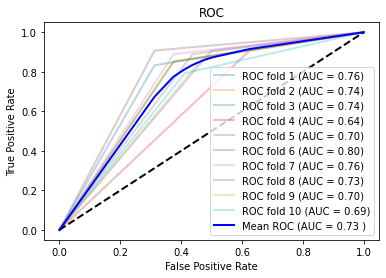

In [202]:
x = X_Train
y = y_gbcTrain
for train,test in kfold.split(x,y):
    model = mimic_dt5.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [203]:
print(recalls)
print(np.mean(recalls))

[0.8333333333333334, 0.8518518518518519, 0.8518518518518519, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.8888888888888888, 0.8888888888888888, 0.8679245283018868, 0.7924528301886793]
0.8697414395527604


In [204]:
print(precisions)
print(np.mean(precisions))

[0.9, 0.8846153846153846, 0.8846153846153846, 0.8305084745762712, 0.8596491228070176, 0.9074074074074074, 0.8888888888888888, 0.8727272727272727, 0.8518518518518519, 0.8571428571428571]
0.8737406644632335


In [205]:
print(f1scores)
print(np.mean(f1scores))

[0.8653846153846153, 0.8679245283018868, 0.8679245283018868, 0.8672566371681415, 0.8828828828828829, 0.9074074074074074, 0.8888888888888888, 0.8807339449541284, 0.8598130841121496, 0.8235294117647058]
0.8711745929166694


In [206]:
print(aucs)
print(np.mean(aucs))

[0.7604166666666667, 0.7384259259259259, 0.7384259259259259, 0.6412037037037037, 0.7037037037037037, 0.7974537037037037, 0.7569444444444444, 0.7256944444444444, 0.6986681465038845, 0.6903440621531631]
0.7251280727175566


Report the performance metrics with the left out testing data:

In [207]:
y_pred = mimic_dt5.predict(X_Test)

In [208]:
scores_gbcMimic = classification_report(y_Test, y_pred, labels=[0, 1])
auc_gbcMimic = roc_auc_score(y_Test, y_pred)
print(scores_gbcMimic)

              precision    recall  f1-score   support

           0       0.54      0.36      0.43       100
           1       0.73      0.84      0.78       200

    accuracy                           0.68       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.66      0.68      0.66       300



In [209]:
auc_gbcMimic

0.6025

## Fairness report of the mimic models

In [210]:
# use foreign worker as protected attributes
prtc_attr = X_Test['gastarb_n']

In [211]:
# Specify either a dict of trained models to compare
model_dict_mimic = {'model_1': mimic_dt1, 'model_2': mimic_dt2, 'model_3': mimic_dt3, 'model_4': mimic_dt4, 'model_4': mimic_dt5}

In [212]:
# Pass the above to the compare models function
fhmc.compare_measures(X_Test, y_Test, prtc_attr, model_dict_mimic)

model_1  \
Group Fairness       Statistical Parity Difference             0.1952   
                     Disparate Impact Ratio                    1.2426   
                     Demographic Parity Difference             0.1952   
                     Demographic Parity Ratio                  0.8048   
                     Average Odds Difference                   0.2362   
                     Equal Opportunity Difference              0.1088   
                     Equalized Odds Difference                 0.3636   
                     Equalized Odds Ratio                      0.6364   
                     Positive Predictive Parity Difference     0.1431   
                     Balanced Accuracy Difference             -0.1274   
                     AUC Difference                           -0.1274   
Individual Fairness  Consistency Score                         0.7467   
                     Between-Group Generalized Entropy Error   0.0000   
Model Performance ** Precision                                 0.7366   
                     Recall                                    0.8950   
                     F1-Score                                  0.8081   
                     Accuracy                                  0.7167   

                                                              model_2  \
Group Fairness       Statistical Parity Difference            -0.2740   
                     Disparate Impact Ratio                    0.6460   
                     Demographic Parity Difference             0.2740   
                     Demographic Parity Ratio                  0.6460   
                     Average Odds Difference                  -0.4597   
                     Equal Opportunity Difference             -0.2628   
                     Equalized Odds Difference                 0.6566   
                     Equalized Odds Ratio                      0.0000   
                     Positive Predictive Parity Difference     0.2876   
                     Balanced Accuracy Difference              0.1969   
                     AUC Difference                            0.1969   
Individual Fairness  Consistency Score                         0.7200   
                     Between-Group Generalized Entropy Error   0.0026   
Model Performance ** Precision                                 0.7174   
                     Recall                                    0.8250   
                     F1-Score                                  0.7674   
                     Accuracy                                  0.6667   

                                                              model_3  model_4  
Group Fairness       Statistical Parity Difference             0.2466   0.1010  
                     Disparate Impact Ratio                    1.3273   1.1305  
                     Demographic Parity Difference             0.2466   0.1010  
                     Demographic Parity Ratio                  0.7534   0.8845  
                     Average Odds Difference                   0.2923  -0.2429  
                     Equal Opportunity Difference              0.1503   0.1606  
                     Equalized Odds Difference                 0.4343   0.6465  
                     Equalized Odds Ratio                      0.5657   0.0000  
                     Positive Predictive Parity Difference     0.1295   0.2832  
                     Balanced Accuracy Difference             -0.1420   0.4035  
                     AUC Difference                           -0.1420   0.4035  
Individual Fairness  Consistency Score                         0.7100   0.7233  
                     Between-Group Generalized Entropy Error   0.0000   0.0001  
Model Performance ** Precision                                 0.7500   0.7253  
                     Recall                                    0.8550   0.8450  
                     F1-Score                                  0.7991   0.7806  
                     Accuracy                          